In [18]:
import tushare as ts
ts.set_token("493a07b6e83f937e4fe4f7ecec5d2a42115535be085a79db37fa3163")
pro=ts.pro_api()
data=pro.daily(ts_code="600036.SH",start_date="20150101",end_date="20200101")

In [19]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600036.SH,20191231,37.85,37.88,37.31,37.58,37.83,-0.25,-0.6609,376805.06,1412996.239
1,600036.SH,20191230,37.60,37.92,37.11,37.83,37.86,-0.03,-0.0792,444962.89,1670186.942
2,600036.SH,20191227,38.10,38.50,37.80,37.86,38.10,-0.24,-0.6299,359535.34,1370335.108
3,600036.SH,20191226,37.78,38.10,37.69,38.10,37.79,0.31,0.8203,192239.76,728012.313
4,600036.SH,20191225,38.01,38.23,37.62,37.79,38.01,-0.22,-0.5788,235027.61,889443.213
...,...,...,...,...,...,...,...,...,...,...,...
1209,600036.SH,20150109,15.56,16.56,15.36,15.71,15.57,0.14,0.9000,4613634.97,7356771.842
1210,600036.SH,20150108,16.25,16.34,15.53,15.57,16.16,-0.59,-3.6500,2929211.10,4621824.801
1211,600036.SH,20150107,16.20,16.56,15.94,16.16,16.42,-0.26,-1.5800,2961696.04,4806397.453
1212,600036.SH,20150106,16.40,17.20,16.29,16.42,16.68,-0.26,-1.5600,4268772.34,7100974.463


In [20]:
data=data.iloc[1:]
data=data.fillna(method="ffill")
data.head

<bound method NDFrame.head of         ts_code trade_date   open   high    low  close  pre_close  change  \
1     600036.SH   20191230  37.60  37.92  37.11  37.83      37.86   -0.03   
2     600036.SH   20191227  38.10  38.50  37.80  37.86      38.10   -0.24   
3     600036.SH   20191226  37.78  38.10  37.69  38.10      37.79    0.31   
4     600036.SH   20191225  38.01  38.23  37.62  37.79      38.01   -0.22   
5     600036.SH   20191224  37.45  38.15  37.45  38.01      37.40    0.61   
...         ...        ...    ...    ...    ...    ...        ...     ...   
1209  600036.SH   20150109  15.56  16.56  15.36  15.71      15.57    0.14   
1210  600036.SH   20150108  16.25  16.34  15.53  15.57      16.16   -0.59   
1211  600036.SH   20150107  16.20  16.56  15.94  16.16      16.42   -0.26   
1212  600036.SH   20150106  16.40  17.20  16.29  16.42      16.68   -0.26   
1213  600036.SH   20150105  16.56  17.07  16.25  16.68      16.59    0.09   

      pct_chg         vol       amount  
1   

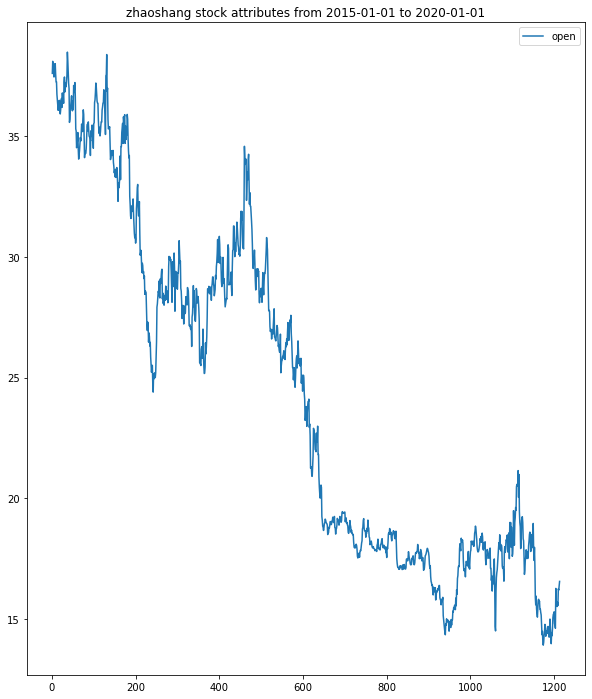

In [21]:
import matplotlib.pyplot as plt
data=data[["trade_date","open"]]
data.plot(subplots=True, figsize=(10, 12))
plt.title("zhaoshang stock attributes from 2015-01-01 to 2020-01-01")
plt.savefig("stock.png")
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller as ADF
diff=0
adf=ADF(data["open"])
if adf[1]>0.05:
    print(u"原始序列经检验不平稳，p值为：%s"%adf[1])
else:
    print(u"原始序列经检验平稳，p值为：%s"%adf[1])

原始序列经检验不平稳，p值为：0.47948330220890917
